<a href="https://colab.research.google.com/github/Monisha09-ds/-/blob/main/TimeSerieswith_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet import Prophet
from google.colab import drive
import os

In [ ]:
import zipfile

zip_file_path = '/content/ezyzip.zip'  # Replace with your ZIP file's path
extract_folder = '/content/ezyzip2.zip'  # Replace with the folder where you want to extract the contents

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(extract_folder)
print("Folder extracted successfully.")


/content/ezyzip2.zip
Folder extracted successfully.


In [ ]:
master_df = pd.DataFrame()  # Initialize an empty DataFrame to store the data

for file in os.listdir(extract_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(extract_folder, file)  # Construct the full file path
        master_df = master_df.append(pd.read_csv(file_path))

<ipython-input-56-33936acf9cbf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file_path))
<ipython-input-56-33936acf9cbf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file_path))
<ipython-input-56-33936acf9cbf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file_path))
<ipython-input-56-33936acf9cbf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(pd.read_csv(file_path))
<ipython-input-56-33936acf9cbf>:6: FutureWarning: The frame.append method is deprecated and will be removed 

In [ ]:
master_df.head()

,Datetime,St(kVA),St(kVA)_update,day,Value Count
0,2023-07-02 00:00:00,97.47,68.2576,Sunday,2
1,2023-07-02 00:01:00,96.27,67.6816,Sunday,2
2,2023-07-02 00:02:00,98.79,69.0832,Sunday,2
3,2023-07-02 00:03:00,98.24,68.4992,Sunday,2
4,2023-07-02 00:04:00,95.44,67.1552,Sunday,2


In [ ]:
master_df.shape

(185242, 5)

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185242 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datetime        185242 non-null  object 
 1   St(kVA)         185242 non-null  float64
 2   St(kVA)_update  185242 non-null  float64
 3   day             185242 non-null  object 
 4   Value Count     185242 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 8.5+ MB


In [ ]:
master_df['day'].value_counts()

Monday       27608
Wednesday    27379
Tuesday      27023
Thursday     26455
Friday       26381
Sunday       25919
Saturday     24477
Name: day, dtype: int64

In [ ]:
master_df.isnull().sum()

Datetime          0
St(kVA)           0
St(kVA)_update    0
day               0
Value Count       0
dtype: int64

In [ ]:
df=master_df.copy()

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly

In [ ]:
df['ds'] =pd.to_datetime(df['Datetime'])
df['y'] = df['St(kVA)_update']

In [ ]:
df.head()

,Datetime,St(kVA),St(kVA)_update,day,Value Count,ds,y
0,2023-07-02 00:00:00,97.47,68.2576,Sunday,2,2023-07-02 00:00:00,68.2576
1,2023-07-02 00:01:00,96.27,67.6816,Sunday,2,2023-07-02 00:01:00,67.6816
2,2023-07-02 00:02:00,98.79,69.0832,Sunday,2,2023-07-02 00:02:00,69.0832
3,2023-07-02 00:03:00,98.24,68.4992,Sunday,2,2023-07-02 00:03:00,68.4992
4,2023-07-02 00:04:00,95.44,67.1552,Sunday,2,2023-07-02 00:04:00,67.1552


In [ ]:
df['Value Count'].value_counts()

2    172747
1     12495
Name: Value Count, dtype: int64

In [ ]:
df.columns

Index(['Datetime', 'St(kVA)', 'St(kVA)_update', 'day', 'Value Count', 'ds',
       'y'],
      dtype='object')

In [ ]:
df.drop(columns =['Datetime', 'St(kVA)', 'St(kVA)_update', 'day', 'Value Count'],inplace=True)

In [ ]:
df.shape

(185242, 2)

<Axes: xlabel='ds'>

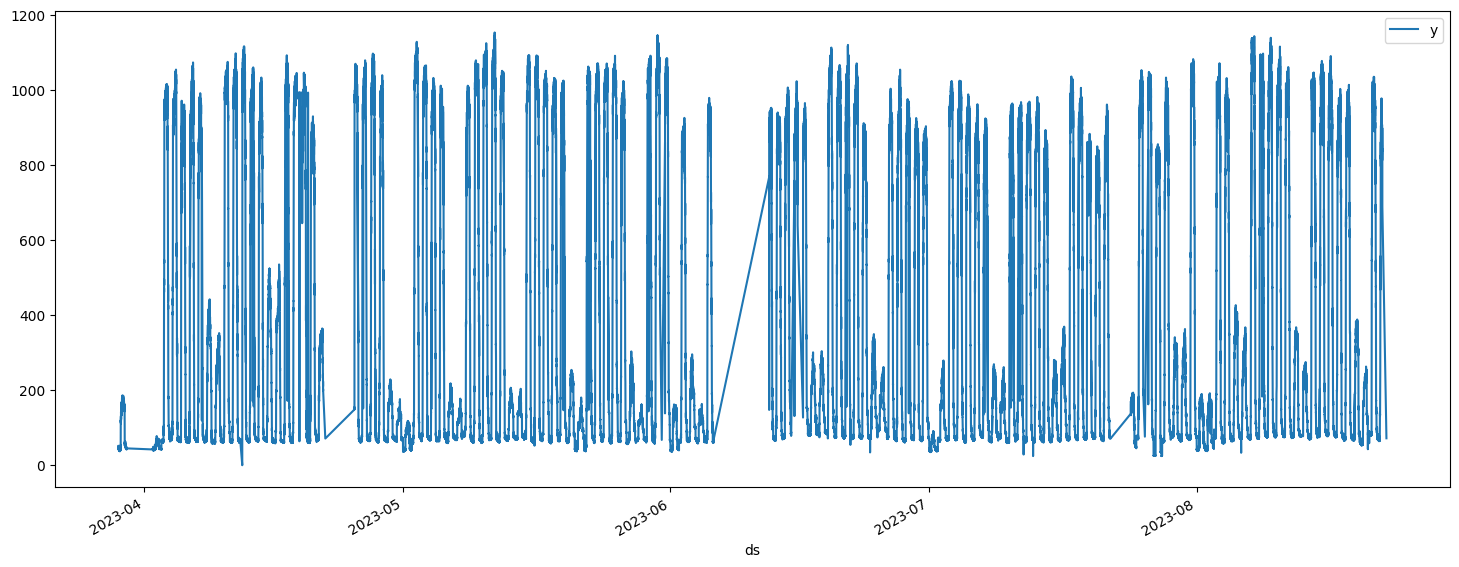

In [ ]:
df.plot(x='ds',y='y',figsize=(18,7))

In [ ]:
len(df)

185242

In [ ]:
train =df.iloc[:len(df)-4000]
test =df.iloc[len(df)-4000:]

In [ ]:
print(len(train),len(test))

181242 4000


In [ ]:
model =Prophet()


In [ ]:
model.fit(train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidv38nh9/gmfu20kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpidv38nh9/tjmarodn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84371', 'data', 'file=/tmp/tmpidv38nh9/gmfu20kg.json', 'init=/tmp/tmpidv38nh9/tjmarodn.json', 'output', 'file=/tmp/tmpidv38nh9/prophet_modeljnf7yc1p/prophet_model-20230903135423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
day = 30
#next how many days value you want to predict.
# for how many days you want the result.
d_2 =int(input())



future_30 = model.make_future_dataframe(periods =d_2)
forcast_30 = model.predict(future_30)

2


In [ ]:
forcast_30.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
181206,2023-08-22 12:38:00,419.919149,608.695233,1131.403002,419.919149,419.919149,451.206949,451.206949,451.206949,322.948307,322.948307,322.948307,128.258642,128.258642,128.258642,0.0,0.0,0.0,871.126098
181207,2023-08-22 12:39:00,419.921849,626.551321,1113.638795,419.921849,419.921849,451.247980,451.247980,451.247980,322.980853,322.980853,322.980853,128.267126,128.267126,128.267126,0.0,0.0,0.0,871.169829
181208,2023-08-22 23:59:00,421.758181,16.007818,521.674468,421.758181,421.758181,-159.324071,-159.324071,-159.324071,-289.565568,-289.565568,-289.565568,130.241497,130.241497,130.241497,0.0,0.0,0.0,262.434110
181209,2023-08-23 23:59:00,425.646882,-24.482303,474.521121,425.646882,425.646882,-204.941751,-204.941751,-204.941751,-289.565568,-289.565568,-289.565568,84.623817,84.623817,84.623817,0.0,0.0,0.0,220.705131
181210,2023-08-24 23:59:00,429.535583,5.060999,486.741815,425.375666,432.643355,-197.168987,-197.168987,-197.168987,-289.565568,-289.565568,-289.565568,92.396581,92.396581,92.396581,0.0,0.0,0.0,232.366597


In [ ]:
forcast_30.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
final_df = forcast_30[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
final_df

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-29 00:00:00,-148.311345,-404.942300,94.662559
1,2023-03-29 00:01:00,-148.144278,-389.489414,91.735362
2,2023-03-29 00:02:00,-147.977768,-401.705860,95.472982
3,2023-03-29 00:03:00,-147.811840,-400.203276,98.227826
4,2023-03-29 00:04:00,-147.646518,-398.512473,91.319716
...,...,...,...,...
181206,2023-08-22 12:38:00,871.126098,608.695233,1131.403002
181207,2023-08-22 12:39:00,871.169829,626.551321,1113.638795
181208,2023-08-22 23:59:00,262.434110,16.007818,521.674468
181209,2023-08-23 23:59:00,220.705131,-24.482303,474.521121


In [ ]:
test.tail()

,ds,y
1435,2023-06-22 23:55:00,73.8992
1436,2023-06-22 23:56:00,74.3072
1437,2023-06-22 23:57:00,74.6352
1438,2023-06-22 23:58:00,72.6272
1439,2023-06-22 23:59:00,74.9904


In [ ]:
#plot_plotly(model,forcast_30)

In [ ]:

#plot_components_plotly(model,forcast_30)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
prediction =forcast_30.iloc[-365]['yhat']

In [ ]:
print("RMSE :",rmse(prediction,test['y']))
print("Mean value of test data :",test['y'].mean())

RMSE : 391.4496496355967
Mean value of test data : 488.2544588


In [ ]:
next_days = model.make_future_dataframe(periods=1, freq='D')

In [ ]:
forcast_next_day =model.predict(next_days)

In [ ]:
forcast_next_day.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-29 00:00:00,10.882709,-386.323307,92.509899,10.882709,10.882709,-159.194054,-159.194054,-159.194054,-289.429855,-289.429855,-289.429855,130.235801,130.235801,130.235801,0.0,0.0,0.0,-148.311345
1,2023-03-29 00:01:00,10.920294,-415.727361,95.040246,10.920294,10.920294,-159.064571,-159.064571,-159.064571,-289.294639,-289.294639,-289.294639,130.230067,130.230067,130.230067,0.0,0.0,0.0,-148.144278
2,2023-03-29 00:02:00,10.957878,-395.130006,92.081339,10.957878,10.957878,-158.935646,-158.935646,-158.935646,-289.159943,-289.159943,-289.159943,130.224298,130.224298,130.224298,0.0,0.0,0.0,-147.977768
3,2023-03-29 00:03:00,10.995463,-395.868744,102.334303,10.995463,10.995463,-158.807303,-158.807303,-158.807303,-289.025794,-289.025794,-289.025794,130.218491,130.218491,130.218491,0.0,0.0,0.0,-147.811840
4,2023-03-29 00:04:00,11.033048,-400.564040,104.152111,11.033048,11.033048,-158.679566,-158.679566,-158.679566,-288.892214,-288.892214,-288.892214,130.212647,130.212647,130.212647,0.0,0.0,0.0,-147.646518


In [ ]:
output_24hour = pd.DataFrame({'Power_consumption':forcast_next_day['yhat']})

In [ ]:
output_to_24h = output_24hour.to_csv('24_hour_prediction',index=False)

In [ ]:
from datetime import datetime, timedelta
future_time = datetime.now() + timedelta(minutes=30)
future_timestamps = pd.date_range(start=future_time, periods=1, freq='30T')  # 30T is 30 minutes
future_dates = pd.DataFrame({'ds': future_timestamps})

In [ ]:

future_dates

,ds
0,2023-08-30 14:22:17.059581


In [ ]:
#Forecasting for next 30 minutes.
forecast_30min = model.predict(future_dates)

In [ ]:
forecast_30min.yhat

0    598.349958
Name: yhat, dtype: float64

In [ ]:
# After 30 minutes prediction for whole day

whole_day_30_min= model.make_future_dataframe

In [ ]:
# Predicting for the next 24 hours
prediction_duration_hours = 24

# Calculate the number of prediction points based on the duration and frequency (30 minutes)
num_prediction_points = int(prediction_duration_hours * 60 / 30)

# Generate future timestamps for every 30 minutes
current_time = datetime.now()
future_timestamps = [current_time + timedelta(minutes=30 * i) for i in range(num_prediction_points)]
future_dates = pd.DataFrame({'ds': future_timestamps})

# Make predictions
forecast_every_30 = model.predict(future_dates)

# List of predictions for every 30 minutes
predictions_list = forecast_every_30[['ds', 'yhat']].values.tolist()

# Print the list of predictions
for prediction in predictions_list:
    print(f"Timestamp: {prediction[0]}, Predicted Value: {prediction[1]}")


Timestamp: 2023-09-03 13:08:15.854676, Predicted Value: 574.9510638597491
Timestamp: 2023-09-03 13:38:15.854676, Predicted Value: 598.5167783384936
Timestamp: 2023-09-03 14:08:15.854676, Predicted Value: 627.2594189733692
Timestamp: 2023-09-03 14:38:15.854676, Predicted Value: 653.3720418677848
Timestamp: 2023-09-03 15:08:15.854676, Predicted Value: 668.4419619596342
Timestamp: 2023-09-03 15:38:15.854676, Predicted Value: 665.3411858145307
Timestamp: 2023-09-03 16:08:15.854676, Predicted Value: 639.7938252544719
Timestamp: 2023-09-03 16:38:15.854676, Predicted Value: 591.2811582239297
Timestamp: 2023-09-03 17:08:15.854676, Predicted Value: 523.1115206542164
Timestamp: 2023-09-03 17:38:15.854676, Predicted Value: 441.683070004728
Timestamp: 2023-09-03 18:08:15.854676, Predicted Value: 355.15226123831803
Timestamp: 2023-09-03 18:38:15.854676, Predicted Value: 271.84490447001065
Timestamp: 2023-09-03 19:08:15.854676, Predicted Value: 198.78214609861516
Timestamp: 2023-09-03 19:38:15.85467

In [ ]:
output_every_30 = pd.DataFrame({'Power_consumption':forecast_every_30['yhat']})

In [ ]:
output_30min= output_every_30.to_csv('every_30min_prediction',index=False)

In [ ]:
output_30min

In [ ]:
df_30 = pd.read_csv('/content/every_30min_prediction')

In [ ]:
df_30.head()

,Power_consumption
0,574.951064
1,598.516778
2,627.259419
3,653.372042
4,668.441962


In [ ]:
df_24 = pd.read_csv('/content/24_hour_prediction')
df.head()

,ds,y
0,2023-07-02 00:00:00,68.2576
1,2023-07-02 00:01:00,67.6816
2,2023-07-02 00:02:00,69.0832
3,2023-07-02 00:03:00,68.4992
4,2023-07-02 00:04:00,67.1552


Newly Coded

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df_22=pd.read_csv('/content/22-May-2023.csv')
df_23=pd.read_csv('/content/23-May-2023.csv')
df_24=pd.read_csv('/content/24-May-2023.csv')
df_25=pd.read_csv('/content/25-May-2023.csv')
df_27=pd.read_csv('/content/27-May-2023.csv')
df_28=pd.read_csv('/content/28-May-2023.csv')
df_29=pd.read_csv('/content/29-May-2023.csv')
df_30=pd.read_csv('/content/30-May-2023.csv')
df_31=pd.read_csv('/content/31-May-2023.csv')

In [ ]:
df_22.shape

(1442, 5)

In [ ]:
data =pd.concat([df_22,df_23,df_24,df_25,df_27,df_28,df_29,df_30],axis =0)

In [ ]:
data.head()

,Datetime,St(kVA),St(kVA)_update,day,Value Count
0,2023-05-22 00:00:00,101.17,71.7136,Monday,2
1,2023-05-22 00:01:00,104.84,73.5872,Monday,2
2,2023-05-22 00:02:00,105.42,73.7536,Monday,2
3,2023-05-22 00:03:00,106.24,74.2592,Monday,2
4,2023-05-22 00:04:00,105.15,73.6720,Monday,2


In [ ]:
data.shape

(11236, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11236 entries, 0 to 1154
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        11236 non-null  object 
 1   St(kVA)         11236 non-null  float64
 2   St(kVA)_update  11236 non-null  float64
 3   day             11236 non-null  object 
 4   Value Count     11236 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 526.7+ KB


In [ ]:
data['ds']=pd.to_datetime(data['Datetime'])

In [ ]:
data['y']=data['St(kVA)_update']

In [ ]:
features =['ds','y']

In [ ]:
final_df = data[features]

In [ ]:
final_df

,ds,y
0,2023-05-22 00:00:00,71.7136
1,2023-05-22 00:01:00,73.5872
2,2023-05-22 00:02:00,73.7536
3,2023-05-22 00:03:00,74.2592
4,2023-05-22 00:04:00,73.6720
...,...,...
1150,2023-05-30 19:10:00,427.7968
1151,2023-05-30 19:11:00,427.8448
1152,2023-05-30 19:12:00,426.0416
1153,2023-05-30 19:13:00,427.3184


In [ ]:
model =Prophet()

In [ ]:
model.fit(final_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesy1g2z1/p0el0a4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpesy1g2z1/1ucob9ys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49066', 'data', 'file=/tmp/tmpesy1g2z1/p0el0a4b.json', 'init=/tmp/tmpesy1g2z1/1ucob9ys.json', 'output', 'file=/tmp/tmpesy1g2z1/prophet_model619evmv8/prophet_model-20230906201652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_30 = model.make_future_dataframe(periods =24,freq="D",include_history=True)

In [ ]:
Forecast_31 = model.predict(future_30)

In [ ]:
Forecast_31.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-22 00:00:00,493.651479,-72.574470,133.170912,493.651479,493.651479,-450.633436,-450.633436,-450.633436,-450.633436,-450.633436,-450.633436,0.0,0.0,0.0,43.018043
1,2023-05-22 00:01:00,493.656502,-65.687094,143.670501,493.656502,493.656502,-450.504079,-450.504079,-450.504079,-450.504079,-450.504079,-450.504079,0.0,0.0,0.0,43.152423
2,2023-05-22 00:02:00,493.661526,-59.173107,145.916583,493.661526,493.661526,-450.370264,-450.370264,-450.370264,-450.370264,-450.370264,-450.370264,0.0,0.0,0.0,43.291262
3,2023-05-22 00:03:00,493.666549,-63.826905,152.478161,493.666549,493.666549,-450.232063,-450.232063,-450.232063,-450.232063,-450.232063,-450.232063,0.0,0.0,0.0,43.434487
4,2023-05-22 00:04:00,493.671573,-63.055574,144.543539,493.671573,493.671573,-450.089547,-450.089547,-450.089547,-450.089547,-450.089547,-450.089547,0.0,0.0,0.0,43.582026


In [ ]:
df_31=pd.read_csv('/content/31-May-2023.csv')
df_31.head()

,Datetime,St(kVA),St(kVA)_update,day,Value Count
0,2023-05-31 09:01:00,413.54,860.1632,Wednesday,1
1,2023-05-31 09:01:00,287.80,138.1440,Wednesday,1
2,2023-05-31 09:02:00,701.27,998.1616,Wednesday,2
3,2023-05-31 09:03:00,692.89,1003.8512,Wednesday,2
4,2023-05-31 09:04:00,698.32,1008.3456,Wednesday,2


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model ,Forecast_31)

New Attempt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_22 =pd.read_csv('22-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_23 =pd.read_csv('23-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_24 =pd.read_csv('24-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_25 =pd.read_csv('25-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_27 =pd.read_csv('27-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_28 =pd.read_csv('28-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_29 =pd.read_csv('29-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_30 =pd.read_csv('30-May-2023.csv',usecols=['Datetime','St(kVA)_update'])
df_31 =pd.read_csv('31-May-2023.csv',usecols=['Datetime','St(kVA)_update'])

In [ ]:
data =pd.concat([df_22,df_23,df_24,df_25,df_27,df_28,df_29,df_30])

In [ ]:
data.head()

,Datetime,St(kVA)_update
0,2023-05-22 00:00:00,71.7136
1,2023-05-22 00:01:00,73.5872
2,2023-05-22 00:02:00,73.7536
3,2023-05-22 00:03:00,74.2592
4,2023-05-22 00:04:00,73.6720


In [ ]:
data.shape

(11236, 2)

In [ ]:
from prophet import Prophet

In [ ]:
data.isnull().sum()

Datetime          0
St(kVA)_update    0
dtype: int64

In [ ]:
data.columns=['ds','y']

<Axes: >

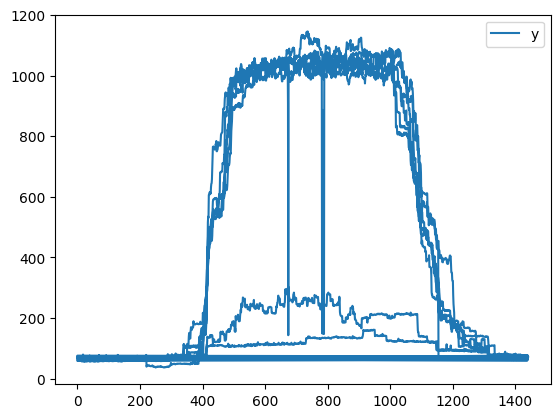

In [ ]:
data.plot()

In [ ]:
data['ds']=pd.to_datetime(data['ds'])

<Axes: >

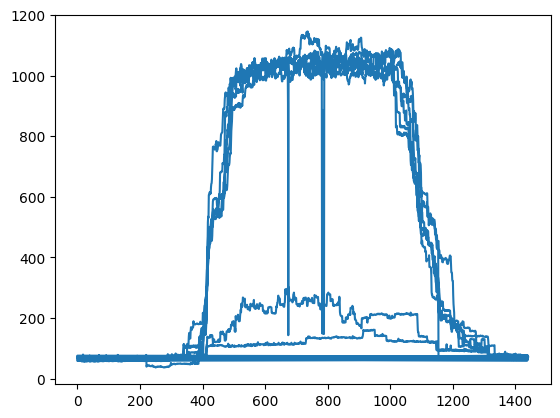

In [ ]:
data['y'].plot()

In [ ]:
model_ph = Prophet()

In [ ]:
model_ph.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrtzzenk/e1ooi1cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgrtzzenk/p6kznrv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74579', 'data', 'file=/tmp/tmpgrtzzenk/e1ooi1cr.json', 'init=/tmp/tmpgrtzzenk/p6kznrv3.json', 'output', 'file=/tmp/tmpgrtzzenk/prophet_modelaiqz9wh7/prophet_model-20230914174456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model_ph

In [ ]:
model_ph.seasonalities

OrderedDict([('daily',
              {'period': 1,
               'fourier_order': 4,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model_ph.component_modes

{'additive': ['daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
Next_day = model_ph.make_future_dataframe(periods=2)

In [ ]:
data.tail()

,ds,y
1150,2023-05-30 19:10:00,427.7968
1151,2023-05-30 19:11:00,427.8448
1152,2023-05-30 19:12:00,426.0416
1153,2023-05-30 19:13:00,427.3184
1154,2023-05-30 23:59:00,67.4448


In [ ]:
Next_day.tail()

,ds
11229,2023-05-30 19:12:00
11230,2023-05-30 19:13:00
11231,2023-05-30 23:59:00
11232,2023-05-31 23:59:00
11233,2023-06-01 23:59:00


In [ ]:
preds = model_ph.predict(Next_day)

In [ ]:
preds.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-22 00:00:00,492.617110,-60.055772,143.915472,492.617110,492.617110,-448.235030,-448.235030,-448.235030,-448.235030,-448.235030,-448.235030,0.0,0.0,0.0,44.382081
1,2023-05-22 00:01:00,492.623527,-60.676742,146.045814,492.623527,492.623527,-448.110958,-448.110958,-448.110958,-448.110958,-448.110958,-448.110958,0.0,0.0,0.0,44.512569
2,2023-05-22 00:02:00,492.629944,-61.714267,144.062792,492.629944,492.629944,-447.982613,-447.982613,-447.982613,-447.982613,-447.982613,-447.982613,0.0,0.0,0.0,44.647331
3,2023-05-22 00:03:00,492.636361,-52.780460,148.793304,492.636361,492.636361,-447.850063,-447.850063,-447.850063,-447.850063,-447.850063,-447.850063,0.0,0.0,0.0,44.786297
4,2023-05-22 00:04:00,492.642777,-64.980185,153.694181,492.642777,492.642777,-447.713382,-447.713382,-447.713382,-447.713382,-447.713382,-447.713382,0.0,0.0,0.0,44.929395


In [ ]:
preds.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11229,2023-05-30 19:12:00,571.500059,357.835466,556.372599,571.500059,571.500059,-111.557374,-111.557374,-111.557374,-111.557374,-111.557374,-111.557374,0.0,0.0,0.0,459.942685
11230,2023-05-30 19:13:00,571.531357,347.776052,559.305051,571.531357,571.531357,-114.693526,-114.693526,-114.693526,-114.693526,-114.693526,-114.693526,0.0,0.0,0.0,456.837830
11231,2023-05-30 23:59:00,580.482600,33.608296,245.819692,580.482600,580.482600,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,0.0,0.0,0.0,132.127843
11232,2023-05-31 23:59:00,625.551797,-573.984848,871.915294,-126.811941,1310.358840,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,0.0,0.0,0.0,177.197040
11233,2023-06-01 23:59:00,670.620994,-2193.457680,2444.870630,-1728.876996,2902.594157,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,-448.354757,0.0,0.0,0.0,222.266237


In [ ]:
#model_ph.plot(preds)

In [ ]:
from prophet.diagnostics import cross_validation

Simple Prophet Example:


In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [11]:
df =pd.read_csv('/content/PJMW_hourly.csv')
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [12]:
df.shape

(143206, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [14]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [15]:
df['ds']=df['Datetime']
df['y']=df['PJMW_MW']

In [16]:
df=df.drop(columns=['Datetime','PJMW_MW'],axis=1)

In [17]:
df.tail(10)

,ds,y
143196,2018-01-01 15:00:00,7475.0
143197,2018-01-01 16:00:00,7514.0
143198,2018-01-01 17:00:00,7747.0
143199,2018-01-01 18:00:00,8213.0
143200,2018-01-01 19:00:00,8328.0
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0
143205,2018-01-02 00:00:00,7691.0


In [19]:
train = df.iloc[:14206]

In [21]:
test =df.tail(3000)

In [22]:
print('Train Shape :',train.shape,'\n\n','Test Shape :',test.shape,)

Train Shape : (14206, 2) 

 Test Shape : (3000, 2)


In [23]:
X=test.copy()

In [24]:
X.shape

(3000, 2)

In [25]:
model_ph = Prophet()

In [26]:
model_ph.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoce6zni/d0r59gv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoce6zni/ndawwaps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29507', 'data', 'file=/tmp/tmpyoce6zni/d0r59gv1.json', 'init=/tmp/tmpyoce6zni/ndawwaps.json', 'output', 'file=/tmp/tmpyoce6zni/prophet_modelevjz11k3/prophet_model-20230918122555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:25:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future = model_ph.make_future_dataframe(periods = 1,freq='H')

In [28]:
future_pred = model_ph.predict(future)

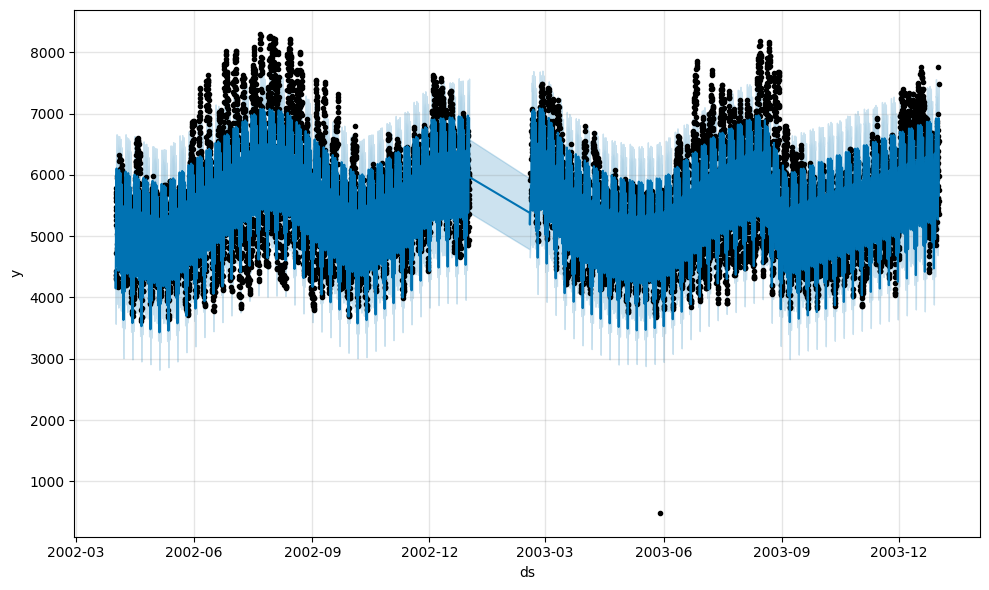

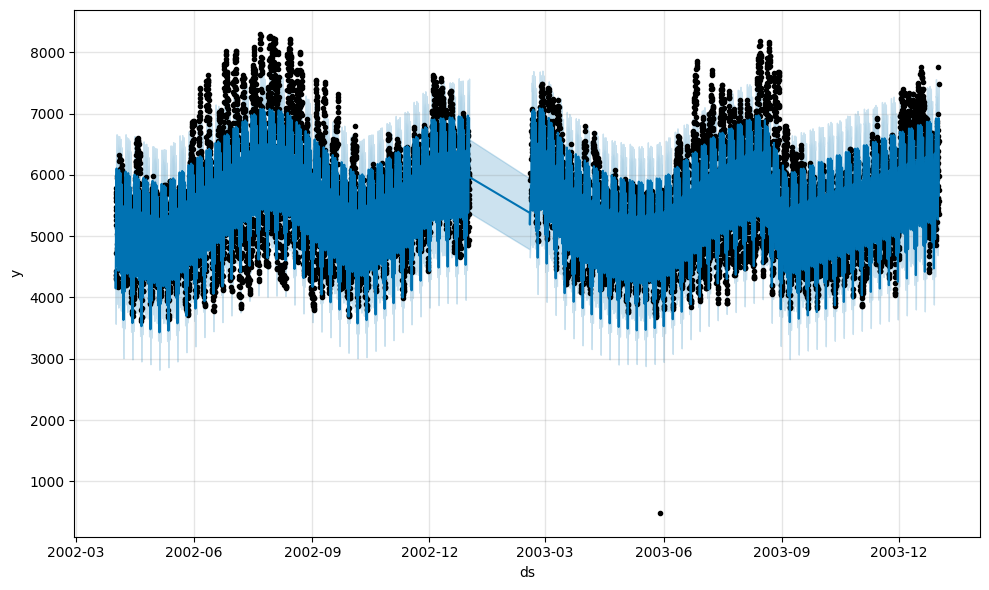

In [29]:
model_ph.plot(future_pred)

In [30]:
future_pred.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [31]:
future_pred = future_pred [['ds','yhat']]

In [32]:
future_pred.head()

,ds,yhat
0,2002-04-01 01:00:00,4421.021220
1,2002-04-01 02:00:00,4229.304167
2,2002-04-01 03:00:00,4146.629531
3,2002-04-01 04:00:00,4172.327046
4,2002-04-01 05:00:00,4305.129833


In [33]:
future_pred.shape

(14207, 2)

In [34]:
print(future_pred['ds'].max())
print(future_pred['ds'].min())
print('\n\n')
print(train['ds'].max())
print(train['ds'].min())
print('\n\n')
print(X['ds'].max())
print(X['ds'].min())

2004-01-01 01:00:00
2002-04-01 01:00:00



2004-01-01 00:00:00
2002-04-01 01:00:00



2018-05-07 00:00:00
2018-01-01 01:00:00


In [35]:
X.head()

,ds,y
140206,2018-05-07 00:00:00,4311.0
140207,2018-05-05 01:00:00,4368.0
140208,2018-05-05 02:00:00,4168.0
140209,2018-05-05 03:00:00,4090.0
140210,2018-05-05 04:00:00,3961.0


In [36]:
model_2 =Prophet()


In [37]:
model_2.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoce6zni/lan5hmmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoce6zni/_nbfybo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44157', 'data', 'file=/tmp/tmpyoce6zni/lan5hmmj.json', 'init=/tmp/tmpyoce6zni/_nbfybo_.json', 'output', 'file=/tmp/tmpyoce6zni/prophet_model56s_cv9o/prophet_model-20230918122632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
forecast_10 = model_2.make_future_dataframe(periods = 6208 )
forecast_10_pred = model_2.predict(forecast_10)

In [39]:
forecast_10_pred.shape

(20414, 19)

In [40]:
forecast_10_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20409,2020-12-26,54637.097078,-1.366644e+06,1.446794e+06,-1.367111e+06,1.447380e+06,-400.943589,-400.943589,-400.943589,-333.938996,-333.938996,-333.938996,-67.004593,-67.004593,-67.004593,0.0,0.0,0.0,54236.153490
20410,2020-12-27,54644.923933,-1.367372e+06,1.446755e+06,-1.367376e+06,1.447727e+06,-901.048923,-901.048923,-901.048923,-333.938996,-333.938996,-333.938996,-567.109927,-567.109927,-567.109927,0.0,0.0,0.0,53743.875010
20411,2020-12-28,54652.750787,-1.368378e+06,1.447760e+06,-1.367641e+06,1.448073e+06,-545.566820,-545.566820,-545.566820,-333.938996,-333.938996,-333.938996,-211.627824,-211.627824,-211.627824,0.0,0.0,0.0,54107.183967
20412,2020-12-29,54660.577641,-1.367709e+06,1.447887e+06,-1.367906e+06,1.448419e+06,-75.825921,-75.825921,-75.825921,-333.938996,-333.938996,-333.938996,258.113076,258.113076,258.113076,0.0,0.0,0.0,54584.751721
20413,2020-12-30,54668.404496,-1.368329e+06,1.449403e+06,-1.368170e+06,1.448765e+06,-146.445141,-146.445141,-146.445141,-333.938996,-333.938996,-333.938996,187.493855,187.493855,187.493855,0.0,0.0,0.0,54521.959355


In [ ]:
# from datetime import datetime

# # Define the start and end dates
# start_date = datetime(2002, 1, 1)
# end_date = datetime(2018, 12, 31)

# # Calculate the number of days
# days_count = (end_date - start_date).days

# print("Number of days from 2002 to 2018:", days_count)

In [41]:
X.sample(3)

,ds,y
141098,2018-03-29 04:00:00,4746.0
140656,2018-04-17 18:00:00,6287.0
141351,2018-03-19 17:00:00,5237.0


In [43]:
print(X['ds'].max())
print(X['ds'].min())

2018-05-07 00:00:00
2018-01-01 01:00:00


In [48]:
start_date = '2018-05-07 00:00:00'
end_date = '2018-01-01 00:00:00'
selected_rows_2 = forecast_10_pred.loc[(forecast_10_pred['ds'] >= start_date) & (forecast_10_pred['ds'] <= end_date)]


In [50]:
selected_rows_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [55]:
specific_year = 2018
filtered_df = forecast_10_pred[forecast_10_pred['ds'].dt.year == specific_year]

In [56]:
filtered_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19319,2018-01-01,46105.825793,-1.044660e+06,1.075643e+06,-1.043563e+06,1.076638e+06,-545.566820,-545.566820,-545.566820,-333.938996,-333.938996,-333.938996,-211.627824,-211.627824,-211.627824,0.0,0.0,0.0,45560.258973
19320,2018-01-02,46113.652648,-1.044077e+06,1.076191e+06,-1.043866e+06,1.076940e+06,-75.825921,-75.825921,-75.825921,-333.938996,-333.938996,-333.938996,258.113076,258.113076,258.113076,0.0,0.0,0.0,46037.826727
19321,2018-01-03,46121.479502,-1.044236e+06,1.076273e+06,-1.044169e+06,1.077242e+06,-146.445141,-146.445141,-146.445141,-333.938996,-333.938996,-333.938996,187.493855,187.493855,187.493855,0.0,0.0,0.0,45975.034361
19322,2018-01-04,46129.306356,-1.044947e+06,1.077110e+06,-1.044473e+06,1.077536e+06,-104.924649,-104.924649,-104.924649,-333.938996,-333.938996,-333.938996,229.014347,229.014347,229.014347,0.0,0.0,0.0,46024.381707
19323,2018-01-05,46137.133211,-1.045487e+06,1.077039e+06,-1.044778e+06,1.077830e+06,-162.817930,-162.817930,-162.817930,-333.938996,-333.938996,-333.938996,171.121066,171.121066,171.121066,0.0,0.0,0.0,45974.315281


In [58]:
filtered_df = filtered_df[['ds','yhat']]

In [60]:
filtered_df.shape

(365, 2)

In [63]:
X.shape

(3000, 2)

In [66]:
X =X.iloc[:365]


In [69]:
X.shape

(365, 2)

In [70]:
date_min_X = X['ds'].min()
date_max_X = X['ds'].max()

date_min_df = filtered_df ['ds'].min()
date_max_df = filtered_df ['ds'].max()

print("Date Range: From", date_min_X, "to", date_max_X)
print("Date Range of Filtered DF ",date_min_df,date_max_df)

Date Range: From 2018-04-20 01:00:00 to 2018-05-07 00:00:00
Date Range of Filtered DF  2018-01-01 00:00:00 2018-12-31 00:00:00


In [72]:
print(type(X),type(filtered_df))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [73]:
final_df =pd.concat([filtered_df,X],axis=0)

In [75]:
final_df.head()

,ds,yhat,y
19319,2018-01-01,45560.258973,NaN
19320,2018-01-02,46037.826727,NaN
19321,2018-01-03,45975.034361,NaN
19322,2018-01-04,46024.381707,NaN
19323,2018-01-05,45974.315281,NaN


In [76]:
final_df.isnull().sum()

ds        0
yhat    365
y       365
dtype: int64

In [78]:
final_df.dropna()

,ds,yhat,y


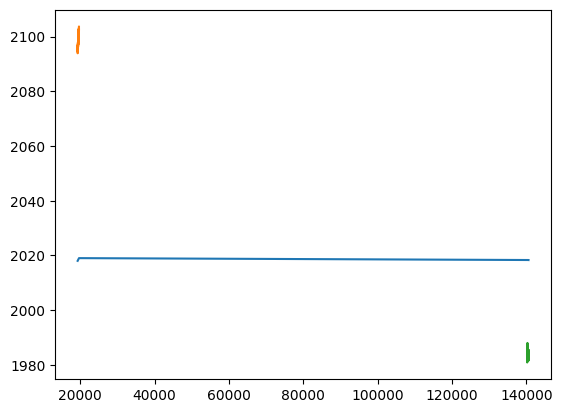

In [80]:
plt.plot(final_df)